## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [3]:
import os
import keras
import itertools
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_BNBeforeActivation(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)

        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)

    x = BatchNormalization()(x)    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_BNBeforeInput(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)

        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

Experiment with BATCH_SIZE = 2.000000, BN is Normal
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (B

50000/50000 [==============================] - 284s 6ms/step - loss: 2.2826 - acc: 0.1318 - val_loss: 2.5067 - val_acc: 0.1472
Epoch 50/50
50000/50000 [==============================] - 278s 6ms/step - loss: 2.2823 - acc: 0.1267 - val_loss: 2.5169 - val_acc: 0.1593
Experiment with BATCH_SIZE = 16.000000, BN is Normal
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2

Epoch 47/50
50000/50000 [==============================] - 35s 704us/step - loss: 1.1104 - acc: 0.6056 - val_loss: 1.3540 - val_acc: 0.5324
Epoch 48/50
50000/50000 [==============================] - 35s 707us/step - loss: 1.1064 - acc: 0.6072 - val_loss: 1.3548 - val_acc: 0.5328
Epoch 49/50
50000/50000 [==============================] - 35s 706us/step - loss: 1.1003 - acc: 0.6094 - val_loss: 1.3983 - val_acc: 0.5132
Epoch 50/50
50000/50000 [==============================] - 35s 706us/step - loss: 1.1036 - acc: 0.6075 - val_loss: 1.3720 - val_acc: 0.5157
Experiment with BATCH_SIZE = 32.000000, BN is Normal
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________

Epoch 45/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.8249 - acc: 0.7045 - val_loss: 1.5147 - val_acc: 0.5175
Epoch 46/50
50000/50000 [==============================] - 20s 404us/step - loss: 0.8074 - acc: 0.7110 - val_loss: 1.5631 - val_acc: 0.5068
Epoch 47/50
50000/50000 [==============================] - 20s 409us/step - loss: 0.8016 - acc: 0.7121 - val_loss: 1.4913 - val_acc: 0.5252
Epoch 48/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.8086 - acc: 0.7103 - val_loss: 1.5992 - val_acc: 0.4940
Epoch 49/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.7994 - acc: 0.7134 - val_loss: 1.6665 - val_acc: 0.4874
Epoch 50/50
50000/50000 [==============================] - 18s 362us/step - loss: 0.7886 - acc: 0.7174 - val_loss: 1.6029 - val_acc: 0.5017
Experiment with BATCH_SIZE = 128.000000, BN is Normal
_________________________________________________________________
Layer (type)                 Output Shap

50000/50000 [==============================] - 7s 130us/step - loss: 0.3387 - acc: 0.8840 - val_loss: 2.3098 - val_acc: 0.4639
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.3336 - acc: 0.8850 - val_loss: 2.3664 - val_acc: 0.4520
Epoch 45/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.3138 - acc: 0.8929 - val_loss: 2.3704 - val_acc: 0.4788
Epoch 46/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.2965 - acc: 0.9002 - val_loss: 2.3825 - val_acc: 0.4600
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2885 - acc: 0.9010 - val_loss: 2.6132 - val_acc: 0.4479
Epoch 48/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.2797 - acc: 0.9042 - val_loss: 2.2720 - val_acc: 0.4811
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.2688 - acc: 0.9091 - val_loss: 2.4954 - val_acc: 0.4694
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 4s 87us/step - loss: 0.2686 - acc: 0.9195 - val_loss: 2.2530 - val_acc: 0.4596
Epoch 42/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2494 - acc: 0.9273 - val_loss: 2.2855 - val_acc: 0.4614
Epoch 43/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.2372 - acc: 0.9317 - val_loss: 2.2787 - val_acc: 0.4669
Epoch 44/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2323 - acc: 0.9319 - val_loss: 2.4673 - val_acc: 0.4500
Epoch 45/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2240 - acc: 0.9348 - val_loss: 2.2968 - val_acc: 0.4730
Epoch 46/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.2096 - acc: 0.9387 - val_loss: 2.2736 - val_acc: 0.4835
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.1952 - acc: 0.9451 - val_loss: 2.3334 - val_acc: 0.4705
Epoch 48/50
50000/50000 [=====================

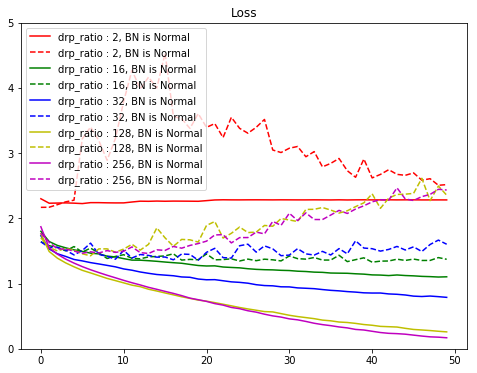

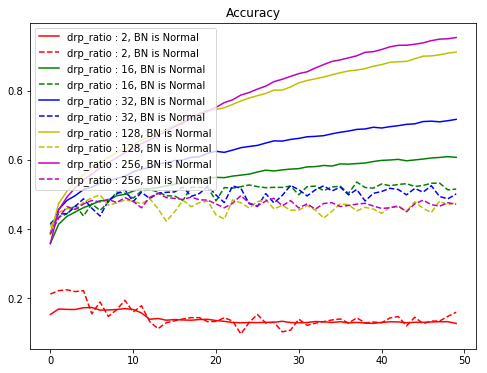

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH in BATCH_SIZE:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (BATCH) + ", BN is Normal")
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio : %s" % str(BATCH) + ", BN is Normal"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with BATCH_SIZE = 2.000000, BN is before Activation
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
________________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
________________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,739,402
Trainable params: 1,739,146
Non-trainable params: 256
________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8418 - acc: 0.3524 - val_loss: 1.7666 - val_acc: 0.3712
Epoch 2/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6285 - acc: 0.4314 - val_loss: 1.7185 - val_acc: 0.3987
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5431 - acc: 0.4589 - val_loss: 1.5903 - val_acc: 0.4234
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4852 - acc: 0.4769 - val_loss: 1.5270 - val_acc: 0.4684
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4402 - acc: 0.4936 - val_loss: 1.5584 - val_acc: 0.4501
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3967 - acc: 0.5117 - val_loss: 1.5417 - val_acc: 0.4518
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.3616 - acc: 0.5208 - val_loss: 1.4814 - val_acc

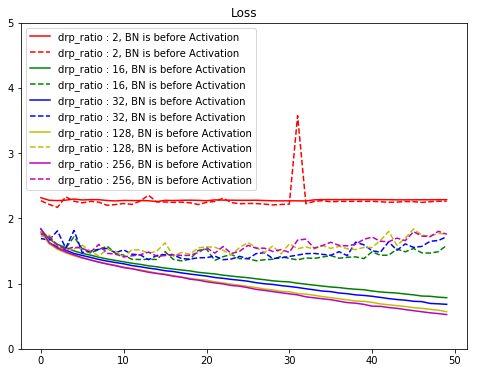

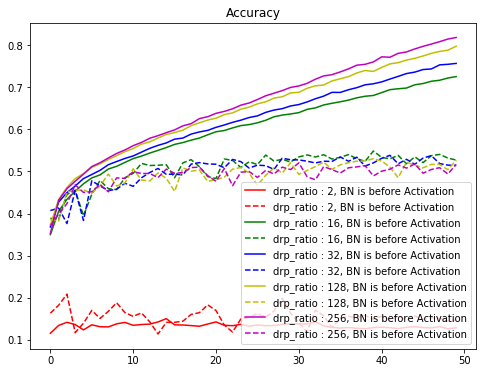

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH in BATCH_SIZE:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (BATCH) + ", BN is before Activation")
    
    model = build_mlp_BNBeforeActivation(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio : %s" % str(BATCH) + ", BN is before Activation"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with BATCH_SIZE = 2.000000, BN is after Input
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.7977 - acc: 0.3513 - val_loss: 1.6436 - val_acc: 0.4117
Epoch 2/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.6130 - acc: 0.4239 - val_loss: 1.5522 - val_acc: 0.4530
Epoch 3/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.5347 - acc: 0.4532 - val_loss: 1.5174 - val_acc: 0.4593
Epoch 4/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.4780 - acc: 0.4728 - val_loss: 1.4738 - val_acc: 0.4763
Epoch 5/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.4278 - acc: 0.4898 - val_loss: 1.4530 - val_acc: 0.4819
Epoch 6/50
50000/50000 [==============================] - 24s 481us/step - loss: 1.3853 - acc: 0.5052 - val_loss: 1.4336 - val_acc: 0.4870
Epoch 7/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.3460 - acc: 0.5212 - val_loss: 1.

50000/50000 [==============================] - 13s 254us/step - loss: 1.8016 - acc: 0.3556 - val_loss: 1.6513 - val_acc: 0.4178
Epoch 2/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.6068 - acc: 0.4281 - val_loss: 1.5496 - val_acc: 0.4543
Epoch 3/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.5225 - acc: 0.4580 - val_loss: 1.5270 - val_acc: 0.4540
Epoch 4/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.4670 - acc: 0.4764 - val_loss: 1.5179 - val_acc: 0.4553
Epoch 5/50
50000/50000 [==============================] - 12s 250us/step - loss: 1.4219 - acc: 0.4942 - val_loss: 1.4384 - val_acc: 0.4807
Epoch 6/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.3813 - acc: 0.5084 - val_loss: 1.4265 - val_acc: 0.4897
Epoch 7/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.3482 - acc: 0.5202 - val_loss: 1.3859 - val_acc: 0.4986
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7188 - acc: 0.3943 - val_loss: 1.6739 - val_acc: 0.4080
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6297 - acc: 0.4269 - val_loss: 1.6011 - val_acc: 0.4384
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5706 - acc: 0.4490 - val_loss: 1.5559 - val_acc: 0.4530
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5220 - acc: 0.4656 - val_loss: 1.5281 - val_acc: 0.4576
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.4797 - acc: 0.4783 - val_loss: 1.5036 - val_acc: 0.4653
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.4420 - acc: 0.4933 - val_loss: 1.4564 - val_acc: 0.4780
Epoch 8/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4064 - acc: 0.5042 - val_loss: 1.4336 - val_acc: 0.4935
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 4s 78us/step - loss: 1.7097 - acc: 0.3986 - val_loss: 1.6833 - val_acc: 0.4092
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6537 - acc: 0.4173 - val_loss: 1.6297 - val_acc: 0.4275
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.6083 - acc: 0.4354 - val_loss: 1.5946 - val_acc: 0.4355
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5686 - acc: 0.4497 - val_loss: 1.5822 - val_acc: 0.4412
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5366 - acc: 0.4609 - val_loss: 1.5471 - val_acc: 0.4561
Epoch 8/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5075 - acc: 0.4707 - val_loss: 1.5237 - val_acc: 0.4620
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4794 - acc: 0.4812 - val_loss: 1.4937 - val_acc: 0.4723
Epoch 10/50
50000/50000 [===========================

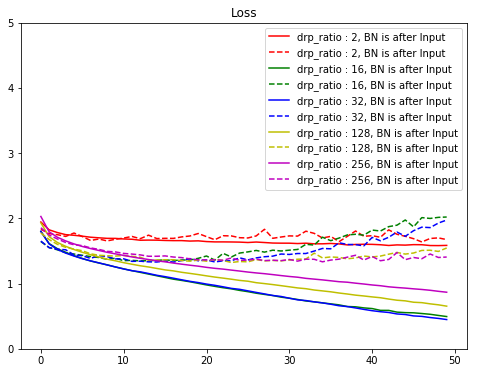

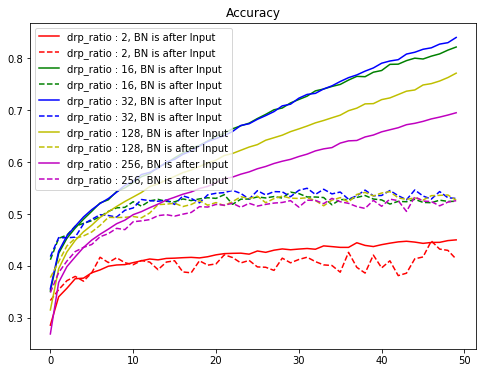

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH in BATCH_SIZE:

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (BATCH) + ", BN is after Input")
    
    model = build_mlp_BNBeforeInput(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drp_ratio : %s" % str(BATCH) + ", BN is after Input"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()